In [3]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter('ignore')
sns.set()
os.chdir(os.getcwd() +'/data')
df_uspa = pd.read_csv('uspa.csv').drop('Unnamed: 0',axis=1)

# Causal Inference With Powerlifting Data:
## <i> Does weighing in close to your bodyweight limit have an affect on performance? </i>

First, we have to define the scope of our dataset and try out best to take care of some of the largest potential confounder variables. 
We'll only look at one weight class and one gender to keep the scale of our data consistent. If we include all weight classes, it is clear that the totals will vary drastically and there is a significant difference between genders as well on average. We'll filter our dataset by the following:
- 67.5 kg weight class, 
- Male lifters, 
- People who compete in "Full-Power" events
- Lifters between the ages of 17 and 35. We narrow our age to this range because most of our data lies within this range (~81%) and we don't want to include too young or too old lifters which can potentially skew the data with "low" totals. 
- We also filter out lifters who disqualified or were a no show and only filter for lifters who competed "raw". 

This attempts to control for potential confoudner variables such as <b> Age, Gender and Weight </b>.
    
<H4> We will define "weighing in close to your bodywight limit" as weighing in 2 pounds or less under the limit. </H4>
    
For the 67.5 kg weight class, that range will be <b> 146.8 pounds - 148.8 pounds </b>. We will consider the other group as lifters who weighed in 2 - 8 pounds under the limit. This range is <b> 140.8 pounds - 146.8 pounds </b>. 
    
We won't look at lifters who weighed in more than 8 pounds under the limit as that is relatively a large difference in weight between the two groups. Instead we want to look at whether or not its beneficial to weigh in as close to the body weight limit and potentially have to cut weight before the meet, or can you perform just as well if you were several pounds under and not have to worry about losing weight.

In [4]:
## Filter dataset as outlined above
subset = df_uspa[(df_uspa['Weight Class'] == '67.5') & (df_uspa.Sex=='M') & (df_uspa['Division Category']==
                                    'Full-Power') &(df_uspa.Age.between(17,35)) & (~df_uspa.Place.isin(['DQ','NS'])) & (df_uspa.Equip=='Raw')]
subset.head()


,Division,Lifter Name,Place,Sex,Age,Equip,Weight Class,Weight (KG),Squat (KG),Bench (KG),...,Competition,Age Division,Division Category,Squat (LB),Bench (LB),Deadlift (LB),Total (LB),Weight (LB),Date Refreshed,Classification
13,Men Raw 67.5 Open,Reynaldo Desenganio,1,M,28.0,Raw,67.5,65.5,137.5,125.0,...,Camp Pendleton Powerlifting Championship,Open,Full-Power,303.135610,275.577828,402.343628,981.057066,144.402782,2022-09-15,Class II
14,Men Raw 67.5 Open,Scott Leonardson,2,M,29.0,Raw,67.5,66.7,132.5,87.5,...,Camp Pendleton Powerlifting Championship,Open,Full-Power,292.112497,192.904479,341.716506,826.733482,147.048329,2022-09-15,Class III
24,Men Raw 67.5 Submasters 35-39,Matt Kinsell,1,M,35.0,Raw,67.5,66.1,165.0,128.0,...,Camp Pendleton Powerlifting Championship,Submasters 35-39,Full-Power,363.762732,282.191695,413.366741,1052.707301,145.725555,2022-09-15,NaN
115,Men Raw 67.5 Juniors 20-23,Michael Leininger,1,M,20.0,Raw,67.5,63.1,70.0,80.0,...,Central California Powerlifting Championships,Junior 20-23,Full-Power,154.323583,176.369810,303.135610,633.829003,139.111687,2022-09-15,NaN
354,Men Raw 67.5 Juniors 18-19,Ian S Krieger,1,M,18.0,Raw,67.5,67.5,150.0,107.5,...,New York State Powerlifting Championship,Junior 18-19,Full-Power,330.693393,236.996932,369.274289,936.964614,148.812027,2022-09-15,NaN


count    2874.000000
mean      145.143869
std         3.294624
min       132.497819
25%       143.741395
50%       146.166480
75%       147.489253
max       148.812027
Name: Weight (LB), dtype: float64

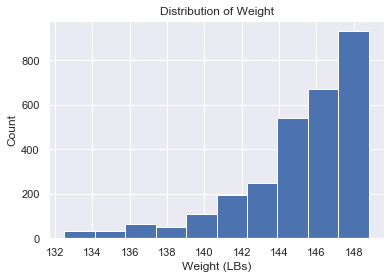

In [5]:
# Plot distribution of Weight
plt.hist(subset['Weight (LB)'])
plt.xlabel('Weight (LBs)')
plt.ylabel('Count')
plt.title('Distribution of Weight')
subset['Weight (LB)'].describe()


In [6]:
## Assign labels and print statistic
subset['close_bw'] = subset['Weight (LB)'].apply(lambda x: x >=146.812027)
subset['not_close_bw'] = subset['Weight (LB)'].apply(lambda x: x> 140.812027 and x <145.812027)

print('Mean Total of those who weighed in 2 pounds or less under the BW Limit: ' + str(subset[subset.close_bw==True]['Total (LB)'].mean()))
print('Mean Total of those who weighed in more than 5-8 pounds under the BW Limit: ' + str(subset[subset.not_close_bw==True]['Total (LB)'].mean()))

## Create dataframe of the two different groups and assign labels
## True = Close to BW Limit, False = Not Close to BW Limit
data = pd.concat([subset[subset.close_bw==True][['close_bw','Total (LB)']],subset[subset.not_close_bw==True][['not_close_bw','Total (LB)']]]
         ).fillna(False).drop('not_close_bw',axis=1).reset_index().drop('index',axis=1)
group1 = data[data.close_bw==True]['Total (LB)']
group2 = data[data.close_bw==False]['Total (LB)']

Mean Total of those who weighed in 2 pounds or less under the BW Limit: 1078.897440816087
Mean Total of those who weighed in more than 5-8 pounds under the BW Limit: 991.565767055333


<p> We can see that most of the lifters weighed in over 140 pounds.
<H4> Now we'll look at the distribution of the totals in pounds of lifters who weighed in close to their body weight and those who didn't. 

Text(0.5, 1.0, 'Overlaid Histogram of Distributions')

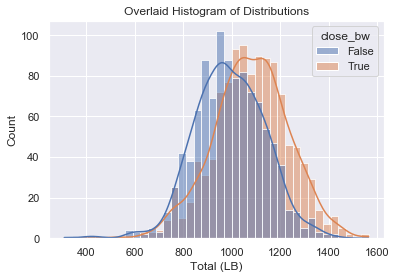

In [7]:
## Look at distributions
sns.histplot(data=data, x='Total (LB)', hue='close_bw', kde=True)
plt.title('Overlaid Histogram of Distributions')

<p> The distribution of total's of lifters who weighed in close to their BW appears to be based slightly to the right of the distribution corresponding to lifters who did not weigh in close to the limit. The totals of the heavier lifters seem higher on average than the totals of the lighter lifters. 
    
<p> This raises the question of whether the difference demonstrates just chance variation or a difference in the distributions in the larger population. Perhaps there is actually no difference between the two distributions in the population, but we are seeing a difference in the samples just because of the lifters in our sample. 
    
<H3> We can attempt to answer this question by a test of hypotheses. The chance model that we will test says that there is no underlying difference in the populations; the distributions in the samples are different just due to chance.</H3>

<p> <b> Null hypothesis (H0): </b> In the population, the distribution of totals in pounds is the same for lifters who weigh in close to their BW limit and for lifters who don't. The difference in the sample is due to chance.

<b> Alternative hypothesis (H1):</b> In the population, the totals of lifters who weigh in close to their BW limit are <b> higher </b> on average, than the totals of those who don't weigh in close to their BW limit

We will use a threshold p-value of 0.05

In [8]:
data.close_bw.value_counts(),data.shape[0]

(True     1135
 False    1035
 Name: close_bw, dtype: int64,
 2170)

<p> There are 2,170 samples with 1,135 of them beimg classified as weighing in close to the limit and 1,035 as not. </p>

<p>The alternative hypothesis compares the average total of the two groups and says that the average for lifters who weigh in close to their BW limit is higher. Therefore it is reasonable for us to use the difference between the two group means as our statistic.

We will do the subtraction in the order “average total of those who weighed in close to the limit -  average total of those who didn't”. Large values (that is, large positive values) of this statistic will favor the alternative hypothesis.

The observed value of the test statistic is about <b> 87 pounds </b>.

In [9]:
# Calclate observed difference
observed_difference = group1.mean() - group2.mean()

# We are going compute such differences repeatedly in our simulations below, so we will define a function to do the job. The function takes
# two arguments:
# The name of the table of data
# The label of the column that contains the Boolean variable for grouping
# It returns the difference between the means of the True group and the False group.
def diff_means(data,label):
    return data[data[label]==True]['Total (LB)'].mean() - data[data[label]==False]['Total (LB)'].mean()
diff_means(data,'close_bw'),observed_difference

(87.33167376075403, 87.33167376075403)

<p> To see how the statistic should vary under the null hypothesis, we have to figure out how to simulate the statistic under that hypothesis. A clever method based on random permutations does just that.

If there were no difference between the two distributions in the underlying population, then whether a lifter has the label True or False with respect to weighing in close to their limit should make no difference to the average. The idea, then, is to shuffle all the labels randomly among the lifters. This is called <b> random permutation. </b>

Shuffling ensures that the count of True labels does not change, and nor does the count of False labels. This is important for the comparability of the simulated differences of means and the original difference of means.

Take the difference of the two new group means: the mean total of the lifters who have been randomly labeled as weighing in close to the limit and the mean total of the lifters who have all been randomly labeled as those who didn't weigh in close to the limit. This is a simulated value of the test statistic under the null hypothesis.



In [10]:
# To shuffle all the labels, draw a random sample of size length of the dataset without replacement. Then the sample will include all the 
# rows of the table, in random order
data['shuffled_label'] = data.sample(n=len(data),replace=False).close_bw.values
print('Difference of the average total between the two randomly labeled groups: ' + str(diff_means(data,'shuffled_label')))
data.head()

Difference of the average total between the two randomly labeled groups: 0.46509659775688306


,close_bw,Total (LB),shuffled_label
0,True,826.733482,True
1,True,936.964614,True
2,True,1096.799753,True
3,True,1019.637962,True
4,True,848.779709,True


<p> The difference of the two averages are quite a bit closer than the averages of the two original groups. But could a different shuffle have resulted in a larger differences between the group averages? To get a sense of variability, we must simulate the difference many times.

In [11]:
# Create a function to return the difference between the mean totals of two groups formed by randomly shuffling all the labels. The function takes two argumetns:
# The name of the table of data
# The label of th ecolumn that contains the boolean variable for grouping
def one_sim_diff_means(data, label):
    data['shuffled_label'] = data.sample(n=len(data),replace=False)[label].values
    return diff_means(data,'shuffled_label')

In [12]:
one_sim_diff_means(data,'close_bw')

-3.835430611742595

<p> We will now simulate our test statistic many times, 10,000 times to be exact. We collect the differences in a list.

In [13]:
# Append test statistic to the list of "differences"
differences = []
repetitions = 10000
for i in np.arange(repetitions):
    differences.append(one_sim_diff_means(data,'close_bw'))

87.33167376075403


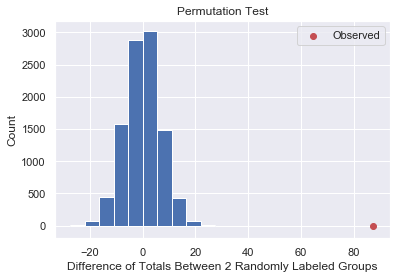

In [14]:
plt.hist(differences)
plt.scatter(observed_difference, 0,c='r',label='Observed')
plt.legend()
plt.xlabel('Difference of Totals Between 2 Randomly Labeled Groups')
plt.ylabel('Count')
plt.title('Permutation Test')
print(observed_difference)

In [15]:
print('P-Value: ' + str((pd.Series(differences) >= observed_difference).sum() / repetitions))

P-Value: 0.0


<p> The histogram above shows the distribution of these 10,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. The distribution is centered around 0, which makes sense because under the null hypothesis, the two groups should have roughly the same average. Therefore, the difference between the group averages should be around 0. The observed difference in the original sample is about 87 pounds, which is far to the right of the graph. The obesrved value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. The conclusion of the test is that the data favors the alternative over the null, meaning that it supports the hypothesis that the average total of lifters who weigh in close to their BW limit are higher than those who weigh in at a lesser weight. The empirical p-value of 0 illustrates that none of the 10,000 permutated samples resulted in a difference of 87 pounds or more. However, it's important to note that this is only an approximation, the exact chance of getting a difference in that range is not 0, but extremely small. </p>

<p> We can also conduct our analysis by using the t-test. The two sample t-test is used to test whether or not the means of two populations are equal. The t-test follows 4 assumptions that must be met: independence, normality, homogeneity of variances, and random sampling. We can say that the observations are independent from each other as in the weight of each lifter does not affect the weight of another lifter. The data was randomly sampled from the population of powerlifters who want to compete. We have alraedy seen the distributions of the two groups above which appeared to be normal and we won't conduct any formal tests for normality here. We will follow the rule of thumb for homogeneity: if the ratio of the larger variance to the smaller variance is less than four, then we can assume the variances are approximately equal.

In [16]:
print(data[data.close_bw==True]['Total (LB)'].var(), data[data.close_bw==False]['Total (LB)'].var())
print('ratio of larger variance to smaller variance:' + str(22957 / 25106))
stats.ttest_ind(a=group1, b=group2,equal_var=True,alternative='greater')


23969.096235015204 20774.34303606704
ratio of larger variance to smaller variance:0.9144029315701426


Ttest_indResult(statistic=13.562706196218222, pvalue=1.3953526140833891e-40)

<p> Nice! We can see that the p-value of the two sample t-test was extremely small, thus supporting the conclusion from our permutation test above. 
    
It is important to note that we are not saying that weighing in close to your body limit causes a lifter to achieve a higher total, we are simply stating that there is a statistical association. This actually makes sense intuitively since the heavier you are, the more you can lift typically. However, this hypothesis test wanted to explore more than just that. Since the USPA allows weigh-in's the day prior to the actual meet, it is common practice for lifters to do a water cut the week of the competition and weigh in as close to their weight limit as possible. Then, after they weigh in they're able to gain that weight back through hydration and food. Therefore, lifters may actually way significantly more than what the scale recorded on meet day. However, Those who weigh in about 2-8 pounds under the limit most likely did not have to do any significant weight cutting the week of competition and their body weight during meet day also most likely did not deviate a lot from what the scale recorded. There are pros and cons to both approach, but we can see here through the use of data that male lifters competing in full-power event in the 67.5 kg weight class, ages from 17-35 who weighed in close to their BW limit tended to achieve higher totals than those who didn't. However, we did not account for other potential confounding variables such as the experience of the lifters, how "competitive" they are in terms of being a professional or novice and the noted weight cut strategy mentioned above.

# Causal Inference With Powerlifting Data PT2:
## <i> Does competing with other lifters in your same weight class affect your performance at a powerlifting meet? </i>

We want to use the same method of permutation testing to compare the totals of lifters who competed solo in their weight class at a meet versus those who competed with other people. Similarily to how it is challenging for runners it Cross Country or Track & Field to perform their personal best running solo, I want to explore the effect of competition and if that can be associated with a higher total in average. Again, we are only looking at the 67.5 kg weight class, males, full-power events, and lifters between the ages of 17 and 35.

In [17]:
## Calculates how many people competed in the 67.5 kg weight class division for every meet
num_lifters = df_uspa[(df_uspa['Weight Class'] == '67.5') & (df_uspa.Sex=='M') & (df_uspa.Age.between(17,35)) & (df_uspa['Division Category']==
                'Full-Power')].groupby(['Date','Competition']).count().Division.reset_index().rename({"Division":'num_lifters'},axis=1)
num_lifters.head()

,Date,Competition,num_lifters
0,2010-10-23,Central California Powerlifting Championships,1
1,2010-12-11,Camp Pendleton Powerlifting Championship,4
2,2011-02-26,West Coast Open Championships,1
3,2011-04-09,State Championships,2
4,2011-04-10,State Championships,1


In [18]:
## The 'num_lifter' column outputs True if that person lifted solo or by himself at that meet, and outputs False if the lifter competed with more than 1 other person at that meet.
subset = subset.merge(num_lifters,on=['Date','Competition'],how='inner')
subset.loc[subset.num_lifters != 1, 'num_lifters'] = False
subset['num_lifters'] = subset.num_lifters.replace({1:True})
subset[['Competition','Weight Class','Lifter Name','Age Division','num_lifters']].head()


,Competition,Weight Class,Lifter Name,Age Division,num_lifters
0,Camp Pendleton Powerlifting Championship,67.5,Reynaldo Desenganio,Open,False
1,Camp Pendleton Powerlifting Championship,67.5,Scott Leonardson,Open,False
2,Camp Pendleton Powerlifting Championship,67.5,Matt Kinsell,Submasters 35-39,False
3,Central California Powerlifting Championships,67.5,Michael Leininger,Junior 20-23,True
4,New York State Powerlifting Championship,67.5,Ian S Krieger,Junior 18-19,True


In [19]:
subset.num_lifters.value_counts(),subset.shape[0]

(False    2405
 True      469
 Name: num_lifters, dtype: int64,
 2874)

<p> Here we can see that our sample size is 2,868 with 2,405 who have competed with other lifters at the meet, and 469 lifters who competed solo. 

In [20]:
group1 = subset[subset.num_lifters==True]['Total (LB)']
group2 = subset[subset.num_lifters ==False]['Total (LB)']
print('Average Total for Solo Competitiors: ' + str(group1.mean())), print('Average Total for Those Who Competed With Others: ' + str(group2.mean()))

Average Total for Solo Competitiors: 993.7381116184941
Average Total for Those Who Competed With Others: 1028.4243683249285


(None, None)

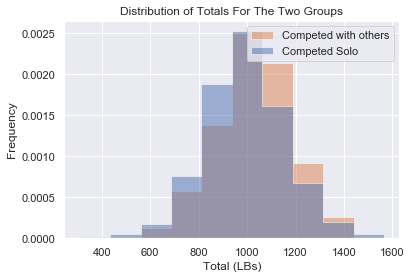

In [21]:
## Look at distributions
plt.hist([group1, group2],histtype='stepfilled',density = True, label=['Competed Solo','Competed with others'],alpha=0.5)
plt.xlabel('Total (LBs)')
plt.ylabel('Frequency')
plt.title('Distribution of Totals For The Two Groups')
plt.legend()


In [22]:
observed_difference = group1.mean() - group2.mean()
print('Observed Difference: ',observed_difference)
data = subset[['num_lifters','Total (LB)']]
diff_means(data,'num_lifters')


Observed Difference:  -34.68625670643439


-34.68625670643439

<p> The obesrved difference is about -34.68 pounds. The negative sign shows that the lifters who competed solo had a lower total than those who competed with others on average. Is this difference due to chance, or does it reflect an underlying difference in the population? As before, we can use a permutation test to answer this question. If the underlying distributions of the total in the two groups are the same, then the empirical distribution of the difference based on permuted samples will predict how the statistic should vary due to chance.

<p> <b> Null hypothesis (H0): </b> In the population, the distribution of totals in pounds is the same for lifters who competed solo and those who competed with others. The difference in the sample is due to chance.

<b> Alternative hypothesis (H1):</b> In the population, the totals of lifters who competed with others in their weight class are higher on average, than the totals of those who competed solo.

We will use a threshold p-value of 0.05

In [23]:
## Reuse our function from earlier to calculate one simulated difference of means between the two randomly sampled groups
one_sim_diff_means(data,'num_lifters')

-8.21889027834311

In [24]:
## Run the permuatation test 10,000 times
differences = []
repetitions = 10000
for i in np.arange(repetitions):
    differences.append(one_sim_diff_means(data,'num_lifters'))

-34.68625670643439


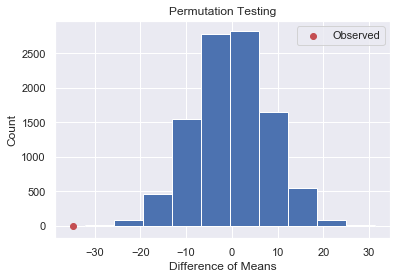

In [25]:
plt.hist(differences)
plt.xlabel('Difference of Means')
plt.ylabel('Count')
plt.title("Permutation Testing")
plt.scatter(observed_difference, 0,c='r',label='Observed')
plt.legend()
print(observed_difference)

In [26]:
(pd.Series(differences) <= observed_difference).sum() / repetitions

0.0

<p> <p> The histogram above shows the distribution of these 10,000 values. The observed difference in the original sample is about -34.68 pounds, which is on the left tail of the graph. The obesrved value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent. The empirical p-value is less than our threshold of 0.05, concluding that the data favors the alternative over the null, meaning that it supports the hypothesis that the average total of lifters who compete with others are higher than those who compete solo.</p>

<p> Again, we can also conduct our analysis by using the t-test. We will test for homogengeneity of variances using the same method as before

In [27]:
print(group1.var(), group2.var())
print('Ratio: ' + str(27042/25393))
stats.ttest_ind(a=group1, b=group2,equal_var=True,alternative='less')


26960.834510912737 25216.54500707012
Ratio: 1.0649391564604418


Ttest_indResult(statistic=-4.303098306186523, pvalue=8.702719995413119e-06)

<p> The 2 sample t-test gives us a p-value of 0.0005, validating the results of our permutation test from above. Nice!
    
This was an interesting question to explore because lifters who compete solo automatically place first place as long as they do not disqualify or "bomb out" of a meet. Therefore, if a lifer knows they are guaranteed a gold medal already, would they still take chances to choose heavier attempts for a chance of a PR or a better total? I know many lifters who try to gauge what their 2nd and 3rd attempts are going to be based off their competition, so would they not go 100% if they lifter by themselves? Here, we can see a statistical difference between lifters who competed solo and those who didn't, which was very interesting to see. Although the observed difference of means was only 34 pounds, those 34 pounds could be the differnece between 1st and 2nd place. Competitors who compete in physical strength/endurance competitions can only push themselves so much, as they are still limited by their physical body's capabilities. However, at a powerlifting meet, there are momemnts a lifter has to decide: "Should I squat 424 for a PR but risk failing or squat 408 which I am 90% confident I can lift" and now when you are competing with other people, you have to factor in what place you're trying to get as well. Again in this scenario, there are several confounding variables we did not account for, and we have an imbalanced dataset where the group that competed by themselves is significantly smaller than those who competed with other people. The differences in sample sizes can introduce biases and affect the validity of the causal inference.